In [7]:
import os
import numpy as np
import BPt as bp

In [8]:
# Useful directory
data_dr = os.path.join(os.path.dirname(os.getcwd()), 'data')

# Load the participents file as a bp Dataset
targets_loc = os.path.join(data_dr, 'ds003097', 'participants.tsv')
data = bp.read_csv(targets_loc, sep='\t', index_col='participant_id')

print(list(data))

# Select to use as our dataset a range of different target variables
data = data[['BMI', 'IST_intelligence_total', 'age', 'sex',
             'education_level', 'STAI_T', 'BIS', 'NEO_N',
             'religious_upbringing', 'religious_now']]

# Tell the dataset that all of the current columns
# should be treated as target variables
data = data.set_role('all', 'target')

list(data)

['age', 'sex', 'handedness', 'BMI', 'education_level', 'background_SES', 'IST_fluid', 'IST_memory', 'IST_crystallised', 'IST_intelligence_total', 'BAS_drive', 'BAS_fun', 'BAS_reward', 'BIS', 'NEO_N', 'NEO_E', 'NEO_O', 'NEO_A', 'NEO_C', 'STAI_T', 'sexual_attraction_M', 'sexual_attraction_F', 'gender_identity_M', 'gender_identity_F', 'religious_upbringing', 'religious_now', 'religious_importance', 'DWI_TR_run1', 'DWI_TR_run2', 'DWI_TR_run3']


['BMI',
 'IST_intelligence_total',
 'age',
 'sex',
 'education_level',
 'STAI_T',
 'BIS',
 'NEO_N',
 'religious_upbringing',
 'religious_now']

We still need to perform some extra processing on the target variables, specifically, let the dataset object know they should be treated as categorical, and then ordinalize them.

In [9]:
# Auto detects which of our columns should be categorical
data = data.auto_detect_categorical()

# Converts to ordinal for just the categorical variables
# i.e., through scope = special keyword category
data = data.ordinalize(scope='category')

Num. categorical variables in dataset: 4


Plot all data (note for the datafiles, the default behavior is to plot the mean value)

BIS: 928 rows


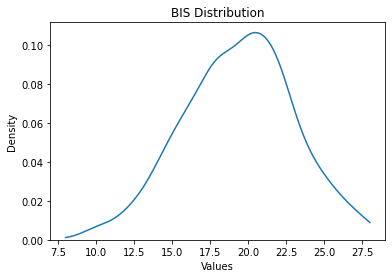

BMI: 928 rows


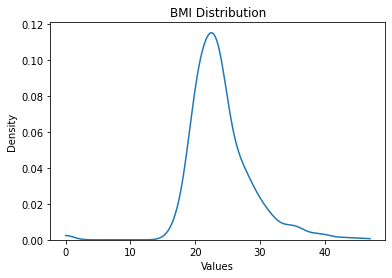

IST_intelligence_total: 926 rows (2 NaN)


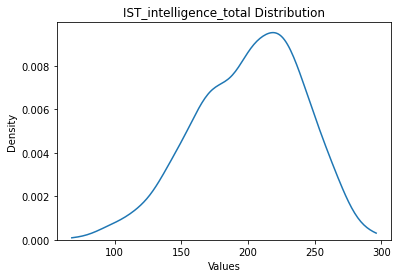

NEO_N: 928 rows


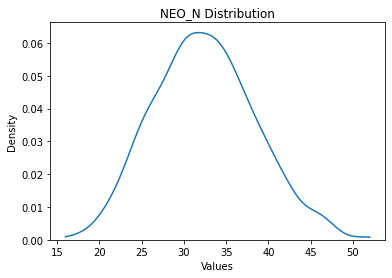

STAI_T: 927 rows (1 NaN)


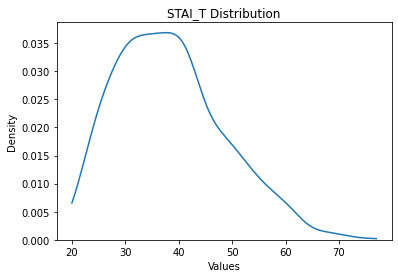

age: 928 rows


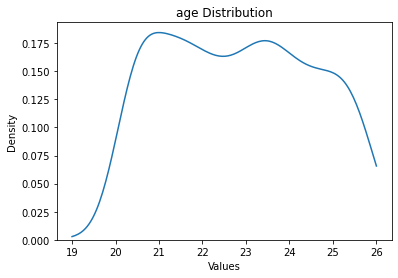

education_level: 928 rows


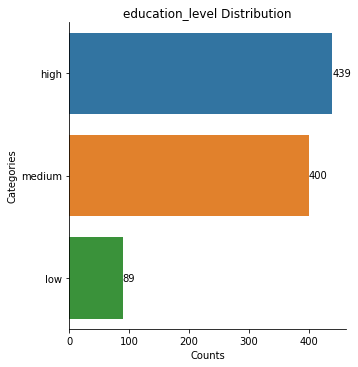

religious_now: 928 rows


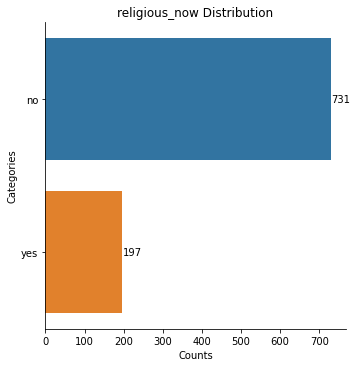

religious_upbringing: 928 rows


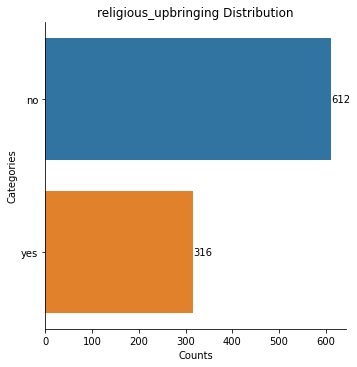

sex: 928 rows


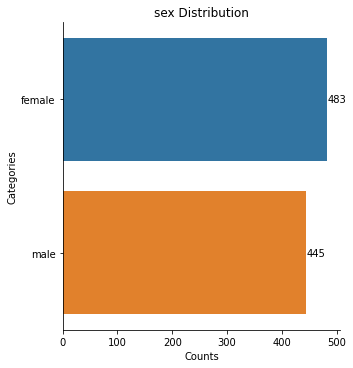

In [10]:
data.plot('all')

The top thing we want to check from this viz are do any of the targets have extreme outliers / impossible values.
 
All of the target variables look okay, with the exception of BMI. In this case we will use some
external knowledge and know that any of the BMI's under 15 are almost certainly an error. Let's also ignore BMI's over 45, which well perhaps possible, we will still just treat as an outlier here. We can set these to NaN.

A note on missing values in target variables. Basically it isn't a big deal, as later on when performing machine learning, any values that are NaN will just be skipped, i.e., not influence training or estimations of validation set performance.

BMI: 919 rows (9 NaN)


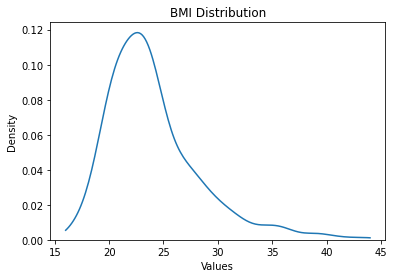

In [11]:
# Grab the subject ids
bmi_weird_subjs = data[(data['BMI'] < 15) | (data['BMI'] > 45)].index

# Just set to NaN in place
data.loc[bmi_weird_subjs, 'BMI'] = np.nan

# Re-plot
data.plot('BMI')

In [13]:
# Save directory, for where to save template
saves_dr = os.path.join(os.getcwd(), 'datasets')
os.makedirs(saves_dr, exist_ok=True)

# Save w/ pickle
data.to_pickle(os.path.join(saves_dr, 'template.dataset'))